# 1) Construcción de capas personalizadas en Pytorch

A continuación puedes observar un ejemplo de cómo implementar una **capa densa** personalizada (que podría servir para construir una red neuronal tipo perceptrón multicapa). La implementación personalizada se basa en crear una subclase de **nn.Module** e implementar los métodos:

* \_\_init\_\_()
* forward()

In [ ]:
#Inicializadores para parámetros de redes neuronales
#https://pytorch.org/docs/stable/nn.init.html#torch-nn-init

import torch
from torch import nn
import math

#Ejemplo de una capa densa personalizada
class FCLayer(nn.Module):
  def __init__(self, in_features, out_features):
    super().__init__()
    self.size_in = in_features
    self.size_out = out_features

    #Definimos los pesos como parámetros de la capa(módulo)
    weights = torch.Tensor(self.size_out, self.size_in)
    self.weights = nn.Parameter(weights)

    #Definimos el bias como parámetro de la capa(módulo)
    bias = torch.Tensor(self.size_out)
    self.bias = nn.Parameter(bias)

    # Inicialización de parámetros (pesos y bias)
    nn.init.xavier_uniform_(self.weights, gain=nn.init.calculate_gain('relu'))
    nn.init.zeros_(self.bias)

  def forward(self, x):
      w_times_x= torch.mm(x, self.weights.t())
      return torch.add(w_times_x, self.bias)

Para verificar el correcto funcionamiento de la capa personalizada:

* definimos un tensor de entrada (datos sintéticos),
* creamos una instancia de **FCLayer()**, indicando **in_features** e **out_features**
* invocamos la capa personalizada con el tensor de entrada
* imprimimos las dimensiones del tensor de salida y verificamos que sus dimensiones correspondan con lo esperado (acorde al tensor de entrada y las características de la capa).


In [ ]:
#Probemos la capa personalizada
input_tensor = torch.randn((5, 3), dtype=torch.float32)
fc=FCLayer(3, 1)
output_tensor=fc(input_tensor)
print(output_tensor.shape)

torch.Size([5, 1])


Es momento de implementar tu propia capara, en esta actividad tu objetivo es crear una capa convolucional, en la que podamos definir:

* **in_channels**: número de canales del tensor de entrada
* **out_channels**: número de canales del tensor de salida
* **kernel_size**: tamaño del filtro (renglones, columnas)
* **stride**: tamaño del desplazamiento del filtro sobre renglónes y columnas
* **padding**: el tamaña del borde que se agrega al tensor de entrada
* **padding_value**: valor utilizado para inicializar el borde.

La salida de la capa debe ser un tensor resultante de aplicar una operación de convolución. Las características del tensor de salida dependerá de:
* el tensor de entrada,
* los parámetros utilizados al crear la capa convolucional.

Para implementar tu capa convolucional **ConvLayer()** utiliza la siguiente plantilla.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class MyConv2dLayer(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, stride=1, padding=0):
        super(MyConv2dLayer, self).__init__()
        self.in_channels = in_channels
        self.out_channels = out_channels
        self.kernel_size = kernel_size
        self.stride = stride
        self.padding = padding

        # Initialize weights and bias
        self.weights = nn.Parameter(torch.randn(out_channels, in_channels, kernel_size, kernel_size))
        self.bias = nn.Parameter(torch.randn(out_channels))

    def forward(self, x):
        # Add padding to the input
        x_padded = F.pad(x, (self.padding, self.padding, self.padding, self.padding))

        # Calculate output spatial dimensions
        batch_size, _, height, width = x_padded.shape
        out_height = (height - self.kernel_size) // self.stride + 1
        out_width = (width - self.kernel_size) // self.stride + 1

        # Create output tensor
        out = torch.zeros((batch_size, self.out_channels, out_height, out_width))

        # Perform convolution
        for i in range(0, height - self.kernel_size + 1, self.stride):
            for j in range(0, width - self.kernel_size + 1, self.stride):
                # Extract the sliding window
                window = x_padded[:, :, i:i+self.kernel_size, j:j+self.kernel_size]
                
                # Compute the convolution output (dot product between filter and window)
                for k in range(self.out_channels):
                    out[:, k, i // self.stride, j // self.stride] = torch.sum(
                        window * self.weights[k, :, :, :], dim=(1, 2, 3)
                    )

        # Add bias
        out += self.bias.view(1, -1, 1, 1)

        return out

In [ ]:
import torch
from torch import nn
import math

class ConvLayer(nn.Module):

  def __init__(self, in_channels, out_channels, kernel_size, stride=1, padding=0, padding_value=0):
    self.in_channels = in_channels
    self.out_channels = out_channels
    self.kernel_size = kernel_size
    self.stride = stride
    self.padding = padding
    self.padding_value = padding_value
    # base tensors
    kernel = torch.Tensor(self.in_channels, self.out_channels, self.kernel_size, self.kernel_size)
    self.kernel = nn.Parameter(kernel)
    
    nn.init.xavier_uniform_(self.kernel, gain=nn.init.calculate_gain('relu'))
    

  def forward(self, x):
    if self.padding > 0:
      x = torch.pad(x, self.padding, value=self.padding_value)
      
    
      
      

Para verificar la correcta implementación de tu capa convolucional **ConvLayer**, realiza las siguientes pruebas:

a) Crea una capa convolucional que reciba como entrada un tensor de dimensiones (10, 1, 256, 256), y utilice 10 filtros de dimensión (3, 3) para aplicar la convolución, con un tamaño de desplazamiento igual a uno de los filtros sobre el tensor de entrada (tanto en columnas como en renglones).

b) Crea una capa convolucional que reciba como entrada un tensor de dimensiones (1, 5, 128, 128), y utilice 3 filtros de dimensión (5, 5) para aplicar la convolución, con un tamaño de desplazamiento igual a dos de los filtros sobre el tensor de entrada (tanto en columnas como en renglones), pero agregando el borde necesario al tensor de entrada para garantizar que el tensor de salida preservará el número de renglónes y columnas que tenía el tensor de entrada.

# 2) Construcción de redes neuronales

Tu objetivo en esta sección es implementar cada una de las redes neuronales que se te presentan de manera gráfica. Observarás que no se específican los parametros de las capas, puedes definir los parámetros que requieras siempre y cuando se generen los tensores de salida con las características esperadas y interconectes las capas acorde a los diagramas.

**a) Red neuronal tipo perceptrón multicapa con un tensor de entrada y dos tensores de salida.**

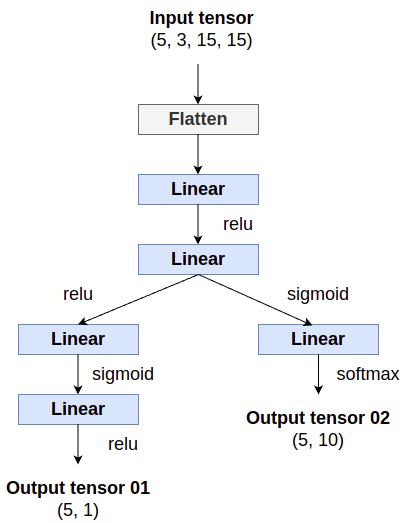

In [24]:
# Implementa aquí tu red neuronal
import torch
from torch import nn
import math

class NN_1_2(nn.Module):

  def __init__(self):
    super().__init__()
    self.relu = nn.ReLU()
    self.sigmoid = nn.Sigmoid()
    self.softmax = nn.Softmax(dim=1)
    self.flatten = nn.Flatten()
    self.f1 = nn.Linear(3*15*15, 1_000)
    self.f2 = nn.Linear(1_000, 500)
    self.f1_1 = nn.Linear(500, 10)
    self.f1_2 = nn.Linear(10, 1)
    self.f2_1 = nn.Linear(500, 10)
    
  def forward(self, x):
    x = self.flatten(x)
    x = self.f1(x)
    x = self.relu(x)
    x = self.f2(x)
    
    x1 = self.relu(x)
    x1 = self.f1_1(x1)
    x1 = self.sigmoid(x1)
    x1 = self.f1_2(x1)
    x1 = self.relu(x1)
    
    x2 = self.sigmoid(x)
    x2 = self.f2_1(x2)
    x2 = self.softmax(x2)
    return x1, x2

In [25]:
# Para verificar tu implementación
# a) crea el tensor de entrada
x = torch.randn((5, 3, 15, 15), dtype=torch.float32)
# b) crea una instancia de tu red neuronal
model_1_2 = NN_1_2()
# c) invoca la red neuronal con el tensor de entrada
out_1, out_2 = model_1_2(x)
# d) verifica las características del tensor de salida
print(out_1.shape), print(out_2.shape)

torch.Size([5, 1])
torch.Size([5, 10])


(None, None)

**b) Red neuronal con dos tensores de entrada y un tensor de salida.**

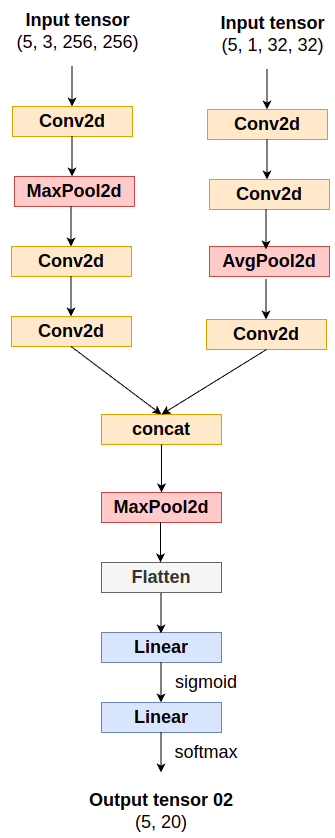

In [17]:
# Implementa aquí tu red neuronal
import torch
from torch import nn
import math

class NN_1_2(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.f1_1 = nn.Conv2d(3, 48, kernel_size=3, stride=2, padding=1)
        self.maxp = nn.MaxPool2d(kernel_size=2, stride=2)
        self.f1_2 = nn.Conv2d(48, 96, kernel_size=5, stride=2, padding=0)
        self.f1_3 = nn.Conv2d(96, 128, kernel_size=7, stride=3, padding=0)
        
        self.f2_1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.f2_2 = nn.Conv2d(32, 48, kernel_size=1, stride=1, padding=0)
        self.avgp = nn.AvgPool2d(kernel_size=2, stride=2)
        self.f2_3 = nn.Conv2d(48, 64, kernel_size=2, stride=2, padding=0)
        
        self.maxp = nn.MaxPool2d(kernel_size=4, stride=2)
        self.flatten = nn.Flatten()
        self.f1 = nn.Linear(1728, 2_000)
        self.sigmoid = nn.Sigmoid()
        self.f2 = nn.Linear(2_000, 20)
        self.softmax = nn.Softmax(dim=1)
        
        
    def forward(self, x1, x2):
        
        x1 = self.f1_1(x1)
        x1 = self.maxp(x1)
        x1 = self.f1_2(x1)
        x1 = self.f1_3(x1)
        
        x2 = self.f2_1(x2)
        x2 = self.f2_2(x2)
        x2 = self.avgp(x2)
        x2 = self.f2_3(x2)
        
        x = torch.cat((x1, x2), 1)
        x = self.maxp(x)
        x = self.flatten(x)
        x = self.f1(x)
        x = self.sigmoid(x)
        x = self.f2(x)
        x = self.softmax(x)        
        
        return x
        

In [18]:
# Para verificar tu implementación
# a) crea el tensor de entrada
X1 = torch.randn((5, 3, 256, 256), dtype=torch.float32)
X2 = torch.randn((5, 1, 32, 32), dtype=torch.float32)
# b) crea una instancia de tu red neuronal
model = NN_1_2()
# c) invoca la red neuronal con el tensor de entrada
out = model(X1, X2)
# d) verifica las características del tensor de salida
print(out.shape)



torch.Size([5, 20])


**c) Red neuronal con dos tensores de entrada y dos tensores de salida utilizando modelos preentrenados.**

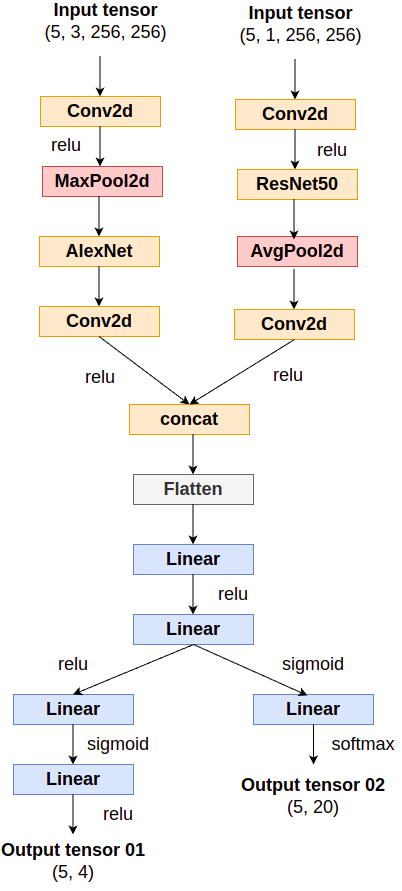

In [8]:
import torch
from torch import nn
from torchvision.models import (
    resnet50, ResNet50_Weights,
    alexnet, AlexNet_Weights,
)

resnet = resnet50(weights=ResNet50_Weights.DEFAULT)
alexnet = alexnet(weights=AlexNet_Weights.DEFAULT)

In [ ]:
# Implementa aquí tu red neuronal
import torch
from torch import nn
import math

class NN_1_2(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)
        
        self.c_2_1 = nn.Conv2d(1, 3, kernel_size=1, stride=1, padding=0)
        self.resnet_cropped = nn.Sequential(*list(resnet.children())[:-2])
        self.avgp = nn.AvgPool2d(kernel_size=2, stride=2)
        self.c_2_2 = nn.Conv2d(2048, 3_000, kernel_size=3, stride=3, padding=0)
        
        self.c_1_1 = nn.Conv2d(3, 3, kernel_size=3, stride=1, padding=1)
        self.maxp = nn.MaxPool2d(kernel_size=2, stride=1)
        self.alexnet_cropped = nn.Sequential(*list(alexnet.children())[:-2])
        self.c_1_2 = nn.Conv2d(256, 500, kernel_size=7, stride=1, padding=0)
        
        self.flatten = nn.Flatten()
        self.f1 = nn.Linear(3_000 + 500, 4_000)
        self.f2 = nn.Linear(4_000, 500)
        
        self.fo_1_1 = nn.Linear(500, 100)
        self.fo_1_2 = nn.Linear(100, 4)
        
        self.fo_2_1 = nn.Linear(500, 20)
        
        
    def forward(self, x1, x2):
        
        x1 = self.c_1_1(x1)
        x1 = self.maxp(x1)
        x1 = self.alexnet_cropped(x1)
        x1 = self.c_1_2(x1)
        
        x2 = self.c_2_1(x2)
        x2 = self.resnet_cropped(x2)
        x2 = self.avgp(x2)
        x2 = self.c_2_2(x2)
        
        x = torch.cat((x1, x2), 1)
        x = self.flatten(x)
        x = self.f1(x)
        x = self.relu(x)
        x = self.f2(x)
        
        x1 = self.relu(x)
        x1 = self.fo_1_1(x1)
        x1 = self.sigmoid(x1)
        x1 = self.fo_1_2(x1)
        x1 = self.relu(x1)
        
        x2 = self.sigmoid(x)
        x2 = self.fo_2_1(x2)
        x2 = self.softmax(x2)        
        
        return x1, x2

In [44]:
# Para verificar tu implementación
# a) crea el tensor de entrada
X1 = torch.randn((5, 3, 256, 256), dtype=torch.float32)
X2 = torch.randn((5, 1, 256, 256), dtype=torch.float32)
# b) crea una instancia de tu red neuronal
model_1_2 = NN_1_2()
# c) invoca la red neuronal con el tensor de entrada
out = model_1_2(X1, X2)
# d) verifica las características del tensor de salida
print(out[0].shape, out[1].shape)



torch.Size([5, 4]) torch.Size([5, 20])


# 3) Generación de conjuntos de datos y Entrenamiento de modelos

La actividad que estas desarrollando sobre el conjunto de datos de hojas para:

* identificación de la especie,
* estado de salud,
* y enfermedad

Te ayudará como preparación rumbo al examen I, sobre todo en la sección de resolución de problemas basado en Deep learning.